In [187]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants
from qutip import *
import random
from numpy.random import choice
import matplotlib.cm as cm
from sympy import *
from IPython.display import Image
from sympy.physics.wigner import wigner_6j
from sympy.physics.quantum.cg import CG
import tqdm
from numpy import random
from scipy.optimize import curve_fit
from matplotlib.cm import ScalarMappable

""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon0 = sp.constants.epsilon_0
mu_0 = sp.constants.mu_0
hbar = sp.constants.hbar
h = sp.constants.h
g = sp.constants.g
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]
mB = sp.constants.physical_constants['Bohr magneton'][0]
inch = 25.4e-3

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

In [195]:
def Bfield(r, num):
    M = 1.2 #in T (also known as remanance)
    V = 10*25*3e-9 #in m3, volume of magnet stack
    m = num*M*V*np.array([[0, 0, 1], [0, 0, -1],[0, 0, 1], [0, 0, -1]])/mu_0 #magnetic moment of the magnet
    a = 39e-3
    ax = 30e-3
    posm = np.array([[ax, a, 0], [ax, -a, 0], [-ax, a, 0], [-ax, -a, 0]]) #position of the magents
    b = 0
    for i, mi in enumerate(m):
        dist = np.sqrt(np.sum(np.square(r-posm[i])))
        b += mu_0/4/np.pi * (3*(r-posm[i])*np.dot(mi, r-posm[i])/dist**5 - mi/dist**3)
    return b

# Bfield with 4 magnet stacks:

In [196]:
num=4

yplot = np.linspace(-1*inch, 1*inch, 15)
zplot = np.linspace(-1*inch, 1*inch, 15)

rb = np.array([[np.array([0,yy,zz]) for yy in yplot] for zz in zplot])

B = np.array([[Bfield(rb[j][i], num) for i in range(len(yplot))] for j in range(len(zplot))]).transpose()
Bx = B[:,:][0]
By = B[:,:][1]
Bz = B[:,:][2]
Bmag = np.sqrt(By**2+Bz**2+Bx**2)

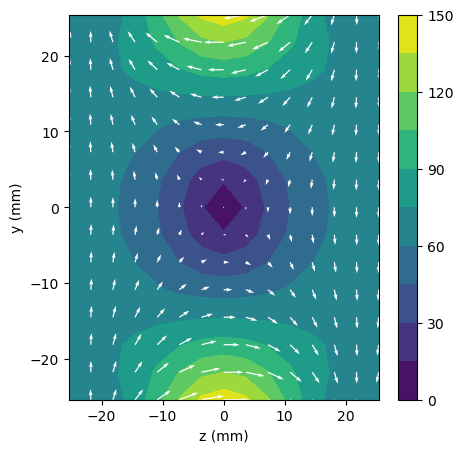

In [197]:
plt.figure(figsize=(5,5))
plot = plt.contourf(zplot*1e3, yplot*1e3, Bmag*1e4, extent=[yplot[0],yplot[-1],zplot[0],zplot[-1]], origin='lower', levels=10)
plt.quiver(zplot*1e3, yplot*1e3, Bz, By, color='white')
plt.xlabel('z (mm)')
plt.ylabel('y (mm)')
plt.colorbar(plot)

In [45]:
yplot = np.linspace(-1*inch, 1*inch, 15)
zplot = np.linspace(-1*inch, 1*inch, 15)

rb = np.array([[np.array([0,yy,zz]) for yy in yplot] for zz in zplot])

B = np.array([[Bfield_simple(rb[j][i], -24e-4/1e-2, 1) for i in range(len(yplot))] for j in range(len(zplot))]).transpose()
B = B[0]
Bx = B[0]
By = B[1]
Bz = B[2]
Bmag = np.sqrt(By**2+Bz**2+Bx**2)

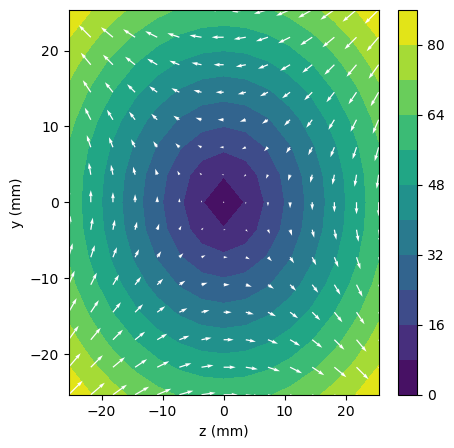

In [46]:
plt.figure(figsize=(5,5))
plot = plt.contourf(zplot*1e3, yplot*1e3, Bmag*1e4, extent=[yplot[0],yplot[-1],zplot[0],zplot[-1]], origin='lower', levels=10)
plt.quiver(zplot*1e3, yplot*1e3, Bz, By, color='white')
plt.xlabel('z (mm)')
plt.ylabel('y (mm)')
plt.colorbar(plot)

In [47]:
def line(x, a, b):
    return a*(x)+b

gradient: -46.710003224747474 G/cm


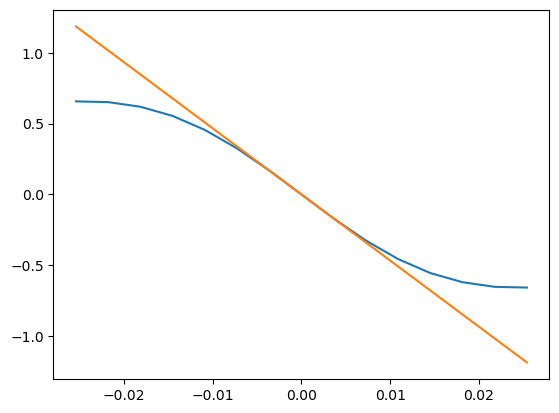

In [198]:
popt, pcov = curve_fit(line, yplot[6:-6], By[8,:][6:-6]*1e4/1e2)
plt.plot(yplot, By[8,:]*1e4/1e2)
plt.plot(yplot, line(yplot, *popt))
print('gradient:', popt[0], 'G/cm')

In [49]:
yplot = np.linspace(-0.3*inch, 0.3*inch, 15)
xplot = np.linspace(-0.3*inch, 0.3*inch, 15)

rb = np.array([[np.array([xx,yy,0]) for yy in yplot] for xx in xplot])

B = np.array([[Bfield(rb[j][i], num) for i in range(len(yplot))] for j in range(len(xplot))]).transpose()
By = B[:,:][1]
Bx = B[:,:][0]
Bz = B[:,:][2]
Bmag = np.sqrt(By**2+Bx**2+Bz**2)

C:\Users\klab\anaconda3\lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\klab\anaconda3\lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


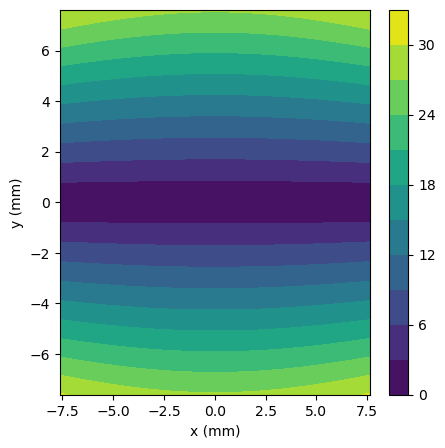

In [50]:
plt.figure(figsize=(5,5))
plot=plt.contourf(xplot*1e3, yplot*1e3, Bmag*1e4, extent=[yplot[0],yplot[-1],xplot[0],xplot[-1]], origin='lower', levels=10)
plt.quiver(xplot*1e3, yplot*1e3, Bx, By, color='white')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(plot)

In [51]:
num_array = np.linspace(1, 6, 10, endpoint=True)
grad_array = []

for num in num_array:
    yplot = np.linspace(-1*inch, 1*inch, 15)
    zplot = np.linspace(-1*inch, 1*inch, 15)

    rb = np.array([[np.array([0,yy,zz]) for yy in yplot] for zz in zplot])

    B = np.array([[Bfield(rb[j][i], num) for i in range(len(yplot))] for j in range(len(zplot))]).transpose()
    Bx = B[:,:][0]
    By = B[:,:][1]
    Bz = B[:,:][2]
    Bmag = np.sqrt(By**2+Bz**2+Bx**2)
    
    popt, pcov = curve_fit(line, yplot[6:-6], By[8,:][6:-6]*1e4/1e2)
    grad_array.append(popt[0])

In [52]:
conv_grad = np.mean(np.divide(grad_array, num_array))

# Monte Carlo

In [53]:
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

In [54]:
L = 1
S = 0
J = 1
I = 1/2
F = 3/2

gJ = 3/2 + (S*(S+1) - L*(L+1)) / 2 / J / (J+1)  
gF = (F*(F+1) + J*(J+1) - I*(I+1)) / 2 / F / (F+1) * gJ

In [55]:
def Bfield_simple(r, Bgrad, Natoms):
    x = np.array([np.zeros(Natoms)+1, np.zeros(Natoms)+0, np.zeros(Natoms)+0])
    y = np.array([np.zeros(Natoms)+0, np.zeros(Natoms)+1, np.zeros(Natoms)+0])
    z = np.array([np.zeros(Natoms)+0, np.zeros(Natoms)+0, np.zeros(Natoms)+1])
    return Bgrad*(r[1]*z + r[2]*y)

In [56]:
def RK4MC(r0, v0, f, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms):
    rn, vn = np.zeros((N,3, Natoms)), np.zeros((N,3, Natoms))
    rn[0], vn[0] = r0, v0
    for n in range(N-1):
        k1, l1 = dt*f(rn[n], vn[n], kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)/m171,  dt*vn[n]
        k2, l2 = dt*f(rn[n] + l1/2, vn[n] + k1/2, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)/m171, dt*(vn[n] + k1/2)
        k3, l3 = dt*f(rn[n] + l2/2, vn[n] + k2/2, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)/m171, dt*(vn[n] + k2/2)
        k4, l4 = dt*f(rn[n] + l3, vn[n] + k3, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)/m171, dt*(vn[n] + k3)
        rn[n+1] = rn[n] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
        vn[n+1] = vn[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4) #+ np.array([np.random.normal(0,vd,Natoms),
                                                         #         np.random.normal(0,vd,Natoms),
                                                          #       np.random.normal(0,vd,Natoms)])/np.sqrt(3)
    #cFrac = captureFrac(Natoms,rn)
    #print('capture fraction = {:.3f}'.format(cFrac))
    return rn, vn, f(rn[n], vn[n], kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)

In [57]:
def intensity(r, kj, P, wx, w, Natoms):
    kjN = np.array([np.zeros(Natoms)+kj[0], np.zeros(Natoms)+kj[1], np.zeros(Natoms)+kj[2]])
    dist2 = np.square(np.array([kjN[1]*r[2]-kjN[2]*r[1], kjN[2]*r[0]-kjN[0]*r[2], kjN[0]*r[1]-kjN[1]*r[0]]))/k**2
    return 2*P/np.pi/wx/w*np.exp( - 2*dist2[0]/wx**2 - 2*(dist2[1]+dist2[2])/w**2) 

In [58]:
P=180e-3
w=10e-3
wx=40e-3

_lambda = 399e-9
k = 2*np.pi/_lambda
Gamma = 2*np.pi*30e6
Isat = 60e-3/1e-4
m171 = 171*u

In [59]:
def Fj(r, v, kj, sj, Delta, P, wx, w, beta_tot, Bgrad, Natoms):
    a = hbar*k*Gamma/m171/2
    betaj = intensity(r, kj, P, wx, w, Natoms)/Isat
    
    kjN = np.array([np.zeros(Natoms)+kj[0], np.zeros(Natoms)+kj[1], np.zeros(Natoms)+kj[2]])
    
    B = Bfield_simple(r, Bgrad, Natoms)
    Bmag = np.sqrt(np.sum(np.square(B), axis=0))
    xi = (kj[0]*B[0]+kj[1]*B[1]+kj[2]*B[2])/k/Bmag
    eta = [ (1+sj*xi)**2/4, (1-xi**2)/2, (1-sj*xi)**2/4 ]
    
    Doppler = (kjN[0]*v[0]+kjN[1]*v[1]+kjN[2]*v[2])
    
    acc = a*betaj * (kjN/k) * np.sum(
    [eta[idx] / (1 + beta_tot + 4*(Delta/Gamma - Doppler/Gamma - mB*gF*n*Bmag/hbar/Gamma)**2) for idx, n in enumerate([-1, 0, 1]) ], axis = 0 
    )
    
    return (acc)*m171

In [60]:
def F2Dmot(r, v, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms):
    beta_tot = np.zeros(Natoms)
    for kj in kj_tot:
        beta_tot = beta_tot + (intensity(r, kj, P, wx, w, Natoms)/Isat)
        
    F = np.zeros((3, Natoms))
    for j, kj in enumerate(kj_tot):
        sj = sj_tot[j]
        F = F+Fj(r, v, kj, sj, Delta, P, wx, w, beta_tot, Bgrad, Natoms)
    return F + g*np.array([np.zeros(Natoms)+0, np.zeros(Natoms)-1, np.zeros(Natoms)+0])*m171

Text(0.5, 0, 'ms')

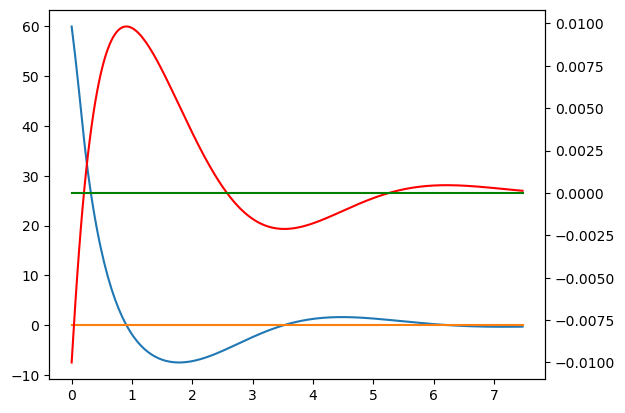

In [159]:
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

x0, y0, z0 = 0, -10e-3, 0
Natoms = 10
r0 = np.array([np.zeros(Natoms)+x0, np.zeros(Natoms)+y0, np.zeros(Natoms)+z0])
v0 = np.array([np.zeros(Natoms)+0, np.zeros(Natoms)+60, np.zeros(Natoms)-0])

dt = 30e-6
Delta= -2.5*Gamma
Bgrad = -40e-4/1e-2
kj_tot = k*np.array([-y-z, -y+z, y+z, y-z])/np.sqrt(2)
sj_tot = [1, -1, 1, -1]

N = 250
rn, vn, fn = RK4MC(r0, v0, F2Dmot, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(np.arange(N)*dt*1e3, np.array(vn)[:,1, 0])
ax.plot(np.arange(N)*dt*1e3, np.array(vn)[:,2, 0])
ax2.plot(np.arange(N)*dt*1e3,np.array(rn)[:,1, 0], c='r')
ax2.plot(np.arange(N)*dt*1e3,np.array(rn)[:,2, 0], c='g')
plt.xlabel('ms')

In [63]:
def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """

    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

def MB_vel(v,m,T, Natoms):
    """ Maxwell-Boltzmann speed distribution for speeds """
    y = np.array([np.zeros(Natoms)+0, np.zeros(Natoms)+1, np.zeros(Natoms)+0])
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * (v[0]*y[0]+v[1]*y[1]+v[2]*y[2]) * np.exp(-m*np.sum(np.square(v), axis=0)/(2*kB*T))

Tl = 700
def MBsample(Tl):
    i = 0
    dv = 0.1
    v = np.arange(0, 600, dv)
    
    while i<1:
        vi = np.random.choice(v)
        y = MB_speed(vi,m171,Tl)
        eps = np.random.random()
        if eps<y*dv:
            i = i+1
        else:
            i=i
    return vi

In [64]:
def captureFrac(Natoms,rn,w):
    Ncapture = 0
    for i in range(Natoms):
        if(np.abs(rn[-1,0,i])<wx and np.abs(rn[-1,1,i])<w and np.abs(rn[-1,2,i])<w):
            Ncapture = Ncapture+1
    return Ncapture/Natoms

In [184]:
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

x0, y0, z0 = 0, -10e-3, 0
Natoms = 10*20*20
v0 = np.array([[[[vx, vy, vz] for vx in np.linspace(-50, 50, 20)] for vy in np.linspace(0, 50, 10)] for vz in np.linspace(-50, 50, 20)]).transpose().reshape(3, Natoms)
r0 = np.array([np.zeros(Natoms)+x0, np.zeros(Natoms)+y0, np.zeros(Natoms)+z0])

dt = 1e-5
N = 200

Delta_ls = np.linspace(-4*Gamma, 0.3*Gamma, 10)
Bgrad_ls = np.linspace(-0.1, -70, 10)*1e-4/1e-2
kj_tot = k*np.array([-y-z, -y+z, y+z, y-z])/np.sqrt(2)
sj_tot = [1, -1, 1, -1]

trapped_fin = np.zeros([10,10])

In [185]:
for i in tqdm.tqdm(range(len(Delta_ls))):
    Delta = Delta_ls[i]
    for j, Bgrad in enumerate(Bgrad_ls):
        trapped = 0
        
        rn, vn, fn = RK4MC(r0, v0, F2Dmot, kj_tot, sj_tot, Delta, P, wx, w, Bgrad, Natoms)
                        
        trapped_fin[i][j] = np.sum(MB_vel(v0,m171,30, Natoms)*(np.abs(rn[-1,0,:])<wx)*(np.abs(rn[-1,1,:])<w)*(np.abs(rn[-1,2,:])<w))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.53s/it]


Text(0.5, 0, 'gradient in centre [G/cm]')

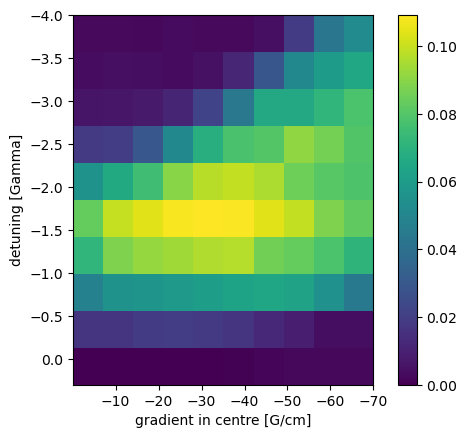

In [186]:
plt.imshow(trapped_fin, extent = [Bgrad_ls[0]*1e2,Bgrad_ls[-1]*1e2, Delta_ls[-1]/Gamma, Delta_ls[0]/Gamma], aspect=20)
plt.colorbar()
plt.ylabel('detuning [Gamma]')
plt.xlabel('gradient in centre [G/cm]')

(array([ 5., 15., 19., 12., 11., 17., 12.,  2.,  5.,  2.]),
 array([ 19.7 ,  29.44,  39.18,  48.92,  58.66,  68.4 ,  78.14,  87.88,
         97.62, 107.36, 117.1 ]),
 <BarContainer object of 10 artists>)

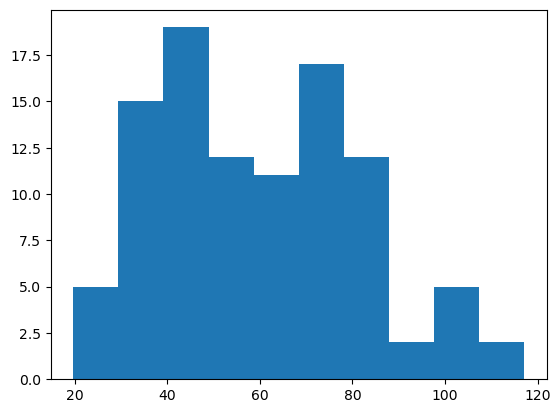

In [183]:
plt.hist([MBsample(30)for n in range(100)])